In [303]:
hopfield.hyperbolic_tangent(0.0001)

0.049958374957880004

In [2]:
import numpy as np


class Hopfield:
    def __init__(self, n_features, init_factor=1):
        self.weights = np.ones((n_features, n_features), dtype=np.float32) * init_factor
        self.n_features = n_features
        # self.n_patterns = n_patterns
    
    def hyperbolic_tangent(self, x):
        # beta = 100 不太夠，1000 能確保完全二值化
        beta = 1000
        return (1 - np.exp(-beta * x)) / (1 + np.exp(-beta * x))
    
    def update_pattern(self, x):
        ori_shape = x.shape
        # 將 pattern 攤平
        x = x.reshape(1, -1)
        u = np.matmul(x, self.weights.T)
        
        v = self.hyperbolic_tangent(u)
        # 回復原本的 shape
        v = v.reshape(ori_shape)
        return v
    
    def recover_pattern(self, cur_state, max_iter=10):
        # operation phase
        for idx, _ in enumerate(range(max_iter)):
            prev_state = cur_state.copy()
            cur_state = self.update_pattern(cur_state)

            # 如果前一個 state 與當前 state 完全相同，代表已經達穩定狀態
            if np.all(cur_state == prev_state):
                print(f'stable at {idx} iteration')
                break
                
        return cur_state
    
    def update_weights(self, patterns):
        # Outer product method
        n = self.weights.shape[0] * self.weights.shape[1]
        p = len(patterns)
        # 迭代每個 pattern
        for z in patterns:
            # 將 pattern 攤平成一維
            z = z.reshape(-1, 1)
            self.weights += np.matmul(z, z.T)

        # self.weights = (self.weights / n) - (np.eye(self.weights.shape[0]) * p / n)
        self.weights /= n
        np.fill_diagonal(self.weights, 0)
   
def add_noise(patterns, ratio, seed=None):
    if seed:
        np.random.seed(seed)
    noisy_patterns = patterns.copy()
    for pattern in noisy_patterns:
       
        ori_shape = pattern.shape
        pattern = pattern.reshape(-1, 1)
        # 打亂 index 後選擇 ratio 比例的數量來翻轉顏色
        flip = np.random.permutation(len(pattern))[:int(len(pattern) * ratio)]
        pattern[flip] *= -1
        pattern = pattern.reshape(ori_shape)

    return noisy_patterns
    

stable at 4 iteration
stable at 6 iteration
stable at 4 iteration
stable at 8 iteration


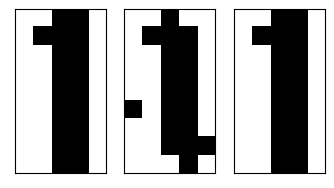

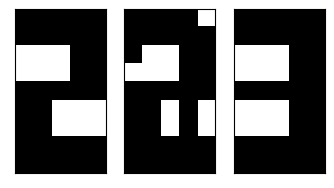

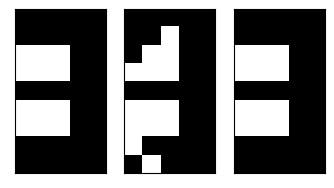

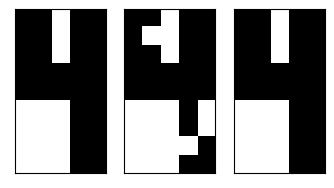

In [4]:
import matplotlib.pyplot as plt
import os
import cv2


patterns = np.array([[[-1, -1, 1, 1, -1],
                    [-1, 1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1],
                    [-1, -1, 1, 1, -1]],
                   [[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, -1, -1, -1],
                    [1, 1, -1, -1, -1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]],
                   [[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]],
                   [[1, 1, -1, 1, 1],
                    [1, 1, -1, 1, 1],
                    [1, 1, -1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1],
                    [-1, -1, -1, 1, 1]]])


# 讓 HNN 記憶原始 pattern
hopfield = Hopfield(patterns.shape[1] * patterns.shape[2], init_factor=0)
hopfield.update_weights(patterns)

noisy_patterns = add_noise(patterns, 0.1, 5)
recovered_patterns = []
for pattern in noisy_patterns:
    recovered_patterns.append(hopfield.recover_pattern(pattern, max_iter=20))


for ori, noi, rec in zip(patterns, noisy_patterns, recovered_patterns):
    plt.figure(figsize=(4, 9))
    plt.subplot(1, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(ori, cmap='gray_r')
    plt.subplot(1, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(noi, cmap='gray_r')
    plt.subplot(1, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(rec, cmap='gray_r')
    plt.show()


In [368]:


# print(hopfield.weights)
# np.where(hopfield.weights < 0, True, False)
# import cv2
# import os

# all_file = os.listdir('../bad_apple')[::5][:20]
# for idx, file in enumerate(all_file):
#     img = cv2.imread(f'../bad_apple/{file}')
#     img = img[:, :, 0]
#     img = np.where(img > 128, 1, -1)
#     img = np.array([img], dtype=np.int8)
#     if idx == 0:
#         patterns = img
#     else:
#         patterns = np.append(patterns, img, axis=0)
# print(patterns.shape)
# noisy_patterns = add_noise(patterns, 0.3, 1)
# for input in noisy_patterns:
#     plt.imshow(input, cmap='gray')
#     plt.show()
# np.fill_diagonal(hopfield.weights, 0)
print(hopfield.weights)

[[1.17737570e-08 1.29511327e-07 1.29511327e-07 ... 8.24162989e-08
  8.24162989e-08 8.24162989e-08]
 [1.29511327e-07 1.17737570e-08 1.29511327e-07 ... 8.24162989e-08
  8.24162989e-08 8.24162989e-08]
 [1.29511327e-07 1.29511327e-07 1.17737570e-08 ... 8.24162989e-08
  8.24162989e-08 8.24162989e-08]
 ...
 [8.24162989e-08 8.24162989e-08 8.24162989e-08 ... 1.17737570e-08
  1.29511327e-07 1.29511327e-07]
 [8.24162989e-08 8.24162989e-08 8.24162989e-08 ... 1.29511327e-07
  1.17737570e-08 1.29511327e-07]
 [8.24162989e-08 8.24162989e-08 8.24162989e-08 ... 1.29511327e-07
  1.29511327e-07 1.17737570e-08]]


In [ ]:
import os
import cv2

all_files = os.listdir('../frames')


all_files = all_files[::24]


for idx, file in enumerate(all_files):
    img = cv2.imread(f'../frames/{file}')
    img = cv2.resize(img, (128, 72))
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    cv2.imwrite(f'../bad_apple/{file}', img)

In [416]:
45 / (4 * np.log(45))

2.9553447489059597